In [10]:
# SYMPY code for ee-Z-WW (s-channel) amplitude and total cross-section

In [11]:
#!python -m pip install sympy

In [12]:
from sympy import *
import prof_berger.heppackv0 as hep 


### Auxiliary Functions

In [13]:
def find_symbol(expr, target: str):
    symb_lst = list(expr.free_symbols)
    names_lst = []
    if len(symb_lst) > 0: 
        for symbol in expr.free_symbols:
            
            names_lst.append(symbol.name)

            if symbol.name in target:
                return symbol
            
            else:
                pass
        
        # print(f"Symbol {target} not found. \n The symbols in the expression are {expr.free_symbols}")
                #pass
        # print(f"Symbol {target} not found. \n The symbols in the expression are {expr.free_symbols}")
        # return None
        return symbols(target, real=True, positive=True)
    # symbol not found, create the same
    else:
        return symbols(target, real=True, positive=True)


# Unify the symbols of different expressions
def unify_symbols(expr1, expr2):
    symbols_expr1 = set([x.name for x in expr1.free_symbols])
    symbols_expr2 = set([x.name for x in expr2.free_symbols])

    common_symbols = symbols_expr1.intersection(symbols_expr2)
    #print(common_symbols)

    symbol_mapping = {}
    for symbol in common_symbols:
        new_symbol = Symbol(symbol)
        symbol_mapping[symbol] = new_symbol

    #print(symbol_mapping)
    expr1 = expr1.subs(symbol_mapping)
    expr2 = expr2.subs(symbol_mapping)

    return expr1, expr2


import pickle

# Salvar um objeto em formato pickle no disco
def save_obj(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as arquivo:
        pickle.dump(objeto, arquivo)
    print(f"Objeto salvo em {nome_arquivo}")

# Carregar um objeto em formato pickle do disco
def load_obj(nome_arquivo):
    with open(nome_arquivo, 'rb') as arquivo:
        objeto = pickle.load(arquivo)
    return objeto

# Define LaTeX expressions
# Parse the LaTeX expressions - EXAMPLE
# Unify symbols with the same text names
#unified_expr1, unified_expr2 = unify_symbols(expr1, expr2)
#dl.replace(dl.args[1].args[0], n)
#print("Unified Expression 1:", unified_expr1)
#print("Unified Expression 2:", unified_expr2)

# Steps for SYMPY calculation

--> The following calculations were based on Prof. Christoph Berger work and functions for HEP calculation on Sympy.

-> Modifications by me, for the original, see his notebooks. https://profchristophberger.com/lehrbuch-elementarteilchenphysik/python/

---
---
---

## Process: $\nu_e(p_1)+\bar \nu_e(p_2)\to S(q) \to W^-_0(k_1)+W^+_0(k_2)$

### Symbols, vectors and constants


In [14]:
## latex symbols doesn't need "$" 
theta, r = symbols('theta r', positive=True)

s, t, u, p, s0, t0, u0, phi, P, Gamma = symbols('s t u p s_0 t_0 u_0 phi P Gamma', real=True, positive=True)

EN, Mmed, MS, mf, mi, m1, m2, m3, m4 = symbols(r'EN M_{med} M_{S} m_{f} m_{i}, m_1 m_2 m_3 m_4', real=True, positive=True)

# Electroweak constants
cv, ca, gz, gw, thetaw, gs_theta, gw_theta = symbols(r'c_v c_a g_Z g_W theta_W g_S_theta g_W_theta', real=True, positive=True )


In [15]:
# 2 -> 2 process, p1, p2 -> q -> k1, k2
p1 = Matrix([sqrt(s)/2, 0, 0, 0])
p2 = Matrix([sqrt(s)/2, 0, pi, pi])
k1 = Matrix([sqrt(s)/2, mf, theta, 0])
k2 = Matrix([sqrt(s)/2, mf, pi-theta, pi])




### Premisses

According to the examples of Prof. Berger, we can define two currents and obtain the corresponding amplitude through the dot product between the two, without the need for any tricks, averages, or trace properties of gamma matrices.
Furthermore, the propagators are already included in the currents, so just multiply "one side by the other" of the diagram to obtain the corresponding amplitude.

The amplitude for the process we are interested in can be written according to the equation below, taken from the Quigg book.

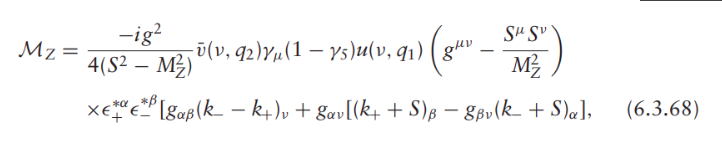

Where the full form of the S scalar propagator, is given by

$$\frac{i}{q^2 - M_{S}^2}$$

###  

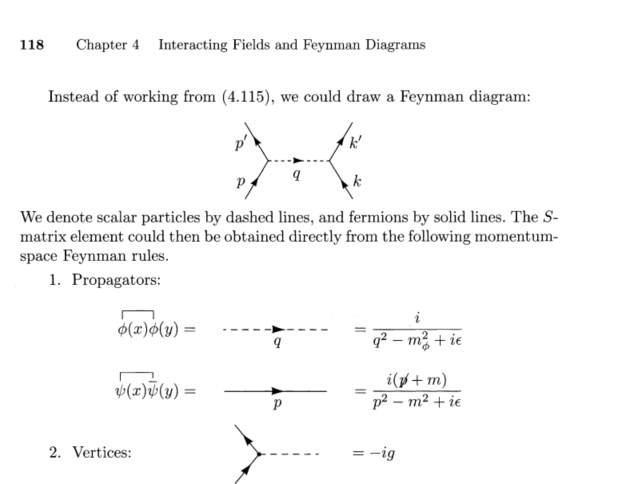

#### Mandelstam kinematics

In [16]:
## s, t, u definition

fp1 = hep.fourvec(p1)
fp2 = hep.fourvec(p2)
fk1 = hep.fourvec(k1)
fk2 = hep.fourvec(k2)

sm = hep.dotprod4(fp1 + fp2, fp1 + fp2)
tm = hep.dotprod4(fp1 - fk1, fp1 - fk1)
um = hep.dotprod4(fp1 - fk2, fp1 - fk2)


q_med = fp1 + fp2
mmed = Mmed


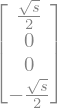

In [17]:
fp2


In [18]:
# ## Here we make some substitutions based on the Mandelstam variables kinematics 

# sCM = 4*EN**2

# tCM = mi**2 + mf**2 - 2*EN**2 + 2*sqrt(EN**2 - mi**2) * sqrt(EN**2-mf**2) * cos(theta)
# tCM = tCM.subs(EN, sqrt(s)/2).subs(sqrt(s - 4*mf**2), xi).subs(sqrt(s - Mmed**2), xi)

# # t0CM= tCM - m**2 - MW**2

# cost = solve(tm - t, cos(theta))
# cost = simplify(cost[0])  #.subs(sqrt(s - 4*MW**2), xi)

# cost_xi = simplify(cost).subs(sqrt(s - 4*mf**2), xi)
# xi_t = solve(cost_xi - cos(theta), xi)[0]

# xi, xi_t, cost, cost_xi


# Ampsquared $| \mathcal M |^2$ evaluation

In [48]:
from sympy import symbols, sqrt, assuming, Q



def get_amp_squared(u1, p1, u2, p2, prop, u3, p3, u4, p4):
    Tems_func = hep.Amplitude_schannel(u1, p1, u2, p2, prop, u3, p3, u4, p4)
    # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    # Some auxiliar variables
    beta, xi = symbols(r'beta xi', real=True, positive=True)
    
    sum_terms = 0
    for T in Tems_func:
        s = find_symbol(T, r's')
        mf = find_symbol(T, r'm_{f}')

        
        res = T.subs(sqrt(s - 4*mf**2), xi).subs(sqrt(sqrt(s) - 2*mf), beta)
        sum_terms +=  res * conjugate(res) ## Summing Squared

    # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    squared_result = sum_terms / 4 # Averaging over the incoming helicities
    
    # # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    # Tres_DM = Tres / 4 # Averaging over the incoming helicities

    # get back to the original form
    squared_result = nsimplify(expand(squared_result)).subs(xi, sqrt(s - 4*mf**2)).subs(beta, sqrt(sqrt(s) - 2*mf))  ## simplify

    # last simplification
    amp_squared = simplify(squared_result)
    amp_squared = collect(collect(amp_squared, s), mf)

    return simplify(amp_squared)

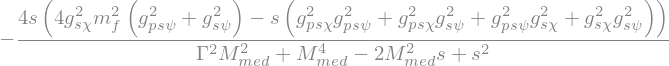

In [49]:
ampsq = get_amp_squared('vbar', p1, 'u', p2, 'scalar', 'ubar', k1, 'v', k2)
ampsq


## $\frac{d \sigma}{dt}$ expression

In [50]:
## Gives the dsig_dt expression and the total x sec integrated (in t) cross section

def dsig_dt(amp_squared):

    # Golden factor  16\pi(s-m^2)^2
    prefactor = 16*pi*(s-mi**2)**2
    prefactor = prefactor.subs(mi, 0)

    dsig_dt =  amp_squared / prefactor


    ## Integration limits in function of t
    tUpper = (1/2) * (2*mi**2 + 2*mf**2 - s + sqrt((s - 4*mi**2)*(s - 4*mf**2)))
    tLower = (1/2) * (2*mi**2 + 2*mf**2 - s - sqrt((s - 4*mi**2)*(s - 4*mf**2)))


    tlower = together(nsimplify(tLower.subs(mi, 0))) 
    tupper = together(nsimplify(tUpper.subs(mi, 0))) 


    totalxsec = 2*pi * integrate(dsig_dt, (t, tlower, tupper))
    totalxsec = simplify(totalxsec)


    return dsig_dt, totalxsec


## Scalar Mediator - s-channel

### Scalar DM

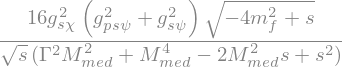

In [51]:
ampsq = get_amp_squared('vbar', p1, 'u', p2, 'scalar', 'phibar', k1, 'phi', k2)

_, S_S_DM = dsig_dt(ampsq)
#_, sigma_DM_noqq = dsig_dt(amp_squared_DM_noqq)
S_S_DM = simplify(S_S_DM)
S_S_DM

### Fermion DM

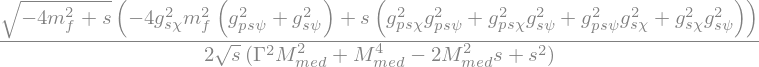

In [52]:
ampsq = get_amp_squared('vbar', p1, 'u', p2, 'scalar', 'ubar', k1, 'v', k2)


#_, sigma_SM = dsig_dt(amp_squared_SM)
_, F_S_DM = dsig_dt(ampsq)
#_, sigma_DM_noqq = dsig_dt(amp_squared_DM_noqq)
F_S_DM = simplify(F_S_DM)
F_S_DM

### Vector DM


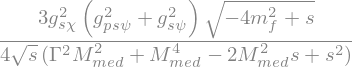

In [53]:
ampsq = get_amp_squared('vbar', p1, 'u', p2, 'scalar', 'polbar', k1, 'pol', k2)


#_, sigma_SM = dsig_dt(amp_squared_SM)
_, V_S_DM = dsig_dt(ampsq)
#_, sigma_DM_noqq = dsig_dt(amp_squared_DM_noqq)
V_S_DM = simplify(V_S_DM)
V_S_DM

# Plots

## Extract the function in python source

In [39]:
# Transformando a expressão em uma função Python
#sigma_SM_func = lambdify((s, Mmed, mf, gf, gv, Gamma), sigma_SM, 'numpy')

sigma_DM_func = lambdify(tuple(totalxsec.free_symbols), totalxsec, 'numpy')


#sigma_DM_noqq_func = lambdify((s, Mmed, mf, gf, gv, Gamma), sigma_DM_noqq, 'numpy')

# Obtendo o código fonte da função
codigo_fonte = {}


#codigo_fonte['SM'] = sigma_SM_func
codigo_fonte['DM'] = sigma_DM_func
#codigo_fonte['DM_noqq'] = sigma_DM_noqq_func

import inspect
for name, func in codigo_fonte.items():

    print(inspect.getsource(func))


def _lambdifygenerated(m_f, g_sx, M_med, s, g_s, Gamma):
    return (1/2)*g_s**2*g_sx**2*(-4*m_f**2 + s)**(3/2)/(sqrt(s)*(Gamma**2*M_med**2 + (-M_med**2 + s)**2))



In [ ]:
binsize = 100
dM = 1/binsize
dmx = 0.5/binsize
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)
# DM particle mass [Tev] #
mx_min = 0.001
mx_max = 2.60
mx_arr = np.arange(mx_min, mx_max, dmx)
# Define a grid
Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot
## CM total energy (14 TeV for HL-LHC)
smax = (3)**2  

In [65]:
import numpy as np
@np.vectorize
def sig0_F_SDM(s, M_med, m_f, g_s, g_sx, Gamma):
    if M_med < 2*m_f:
        return np.nan

    return (1/2)*g_s**2*g_sx**2*np.sqrt((-4*m_f**2 + s)**(3))/(np.sqrt(s)*(Gamma**2*M_med**2 + (-M_med**2 + s)**2))

In [63]:
binsize = 50
dM = 1/binsize
dmx = 0.5/binsize
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)
# DM particle mass [Tev] #
mx_min = 0.001
mx_max = 2.60
mx_arr = np.arange(mx_min, mx_max, dmx)
# Define a grid
Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot
## CM total energy (14 TeV for HL-LHC)
smax = (3)**2  

In [71]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as colorb
from matplotlib import colors
from mpl_toolkits.axes_grid1 import ImageGrid

In [66]:
result = sig0_F_SDM(smax, Mmed_grid, mx_grid, 0.25, 1, 0.001)

/tmp/ipykernel_9818/2085950773.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*g_s**2*g_sx**2*np.sqrt((-4*m_f**2 + s)**(3))/(np.sqrt(s)*(Gamma**2*M_med**2 + (-M_med**2 + s)**2))


In [67]:
result = result*brn

In [68]:
result

array([[          nan, 1352.21494576, 1352.58765136, ...,  406.6137065 ,
         396.78415655,  387.26992835],
       [          nan,           nan, 1352.47944574, ...,  406.58117782,
         396.75241423,  387.23894716],
       [          nan,           nan,           nan, ...,  406.49443892,
         396.66777217,  387.15633467],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

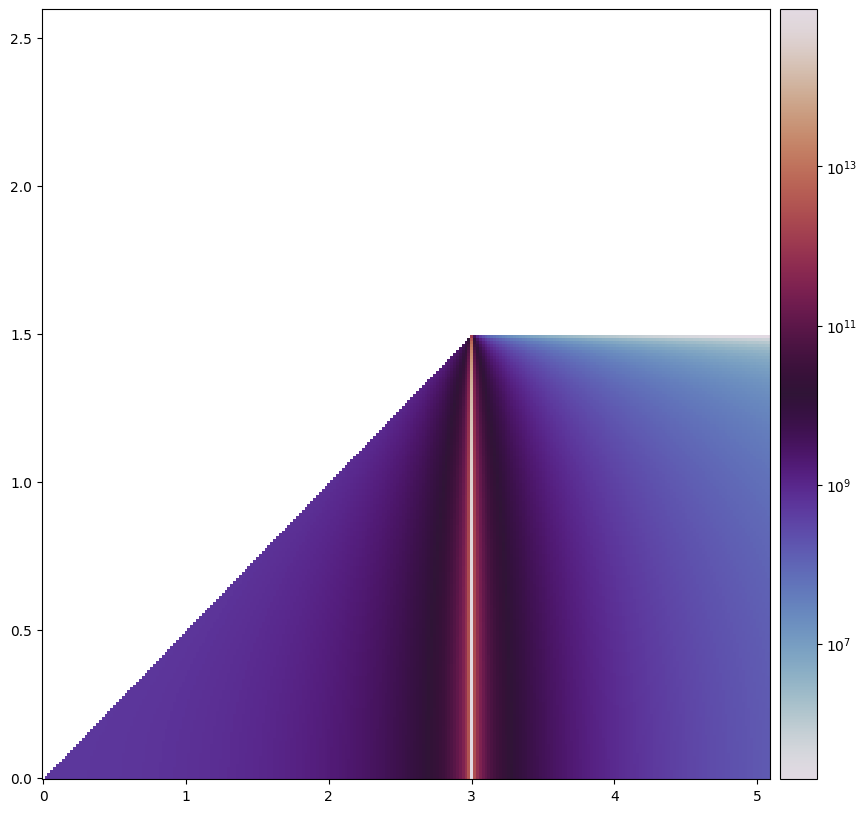

In [74]:
fig = plt.figure(figsize=(10, 10))
ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
        nrows_ncols=(1,1),
        axes_pad=(0.30, 0.0),
        share_all=True,
        cbar_location="right",
        cbar_mode="single",
        cbar_size="5%",
        cbar_pad=0.10,
        aspect=False
        )
                       
brn = 0.3894*10**6 
im = ax[0].pcolormesh(Mmed_grid, mx_grid, result*brn, norm=colors.LogNorm(), cmap= 'twilight', rasterized=True) ## heat map of xsec
ax[0].cax.cla()
cb = colorb.Colorbar(ax[0].cax, im)

plt.show()